In [129]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [130]:
df=pd.read_csv('train.csv')

In [131]:
#seeing the data head
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Start of EDA

#### Removing the NaN values

In [132]:
# seeing all the boolean values of if their is null ot not
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


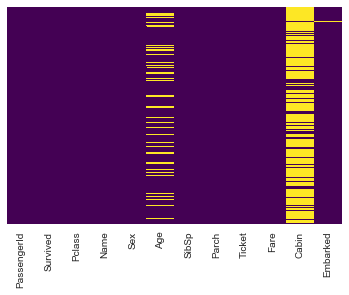

In [133]:
#genrating a heatmap of the null values 
#Yellow is for NaN values 
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=False)

## We see that most NaN value is in Age and Cabin.

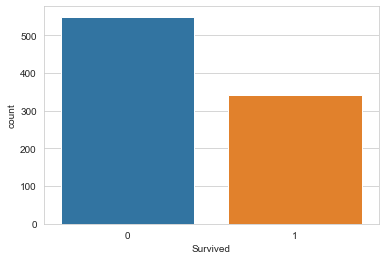

In [134]:
# Some more Visualization 
sns.set_style('whitegrid')
sns.countplot('Survived',data=df)

## We see that more num have died than survived.

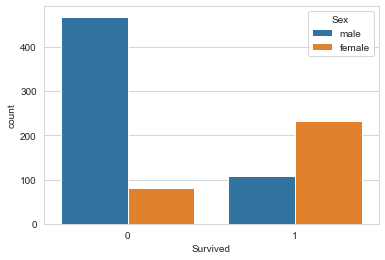

In [135]:
sns.set_style('whitegrid')
sns.countplot('Survived',data=df,hue='Sex')

#### Here we see that the number of males to have died is much more than the number of females and the number of females to survive is high as well.

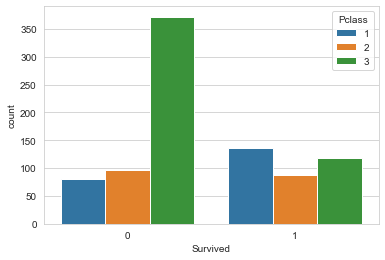

In [136]:
# Sorting the data of survivorship by passenger class 
sns.set_style('whitegrid')
sns.countplot('Survived',data=df,hue='Pclass')

## Here we see that most of he people who died were from third class 

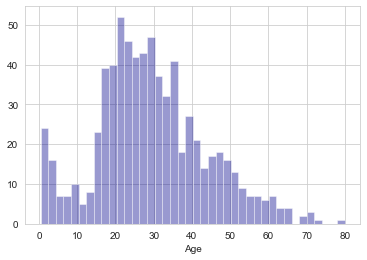

In [137]:
# sorting the surviorship data by age
sns.distplot(df['Age'].dropna(),bins=40,kde=False,color='darkblue')

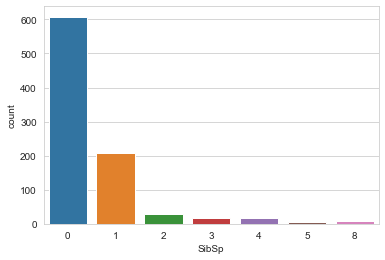

In [138]:
#checking for sibling and spouse count 
sns.countplot(x='SibSp',data=df)

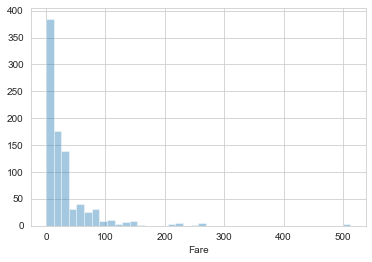

In [139]:
# histogram for fare 
sns.distplot(df.Fare,bins=40,kde=False)

## Removing the Null values 

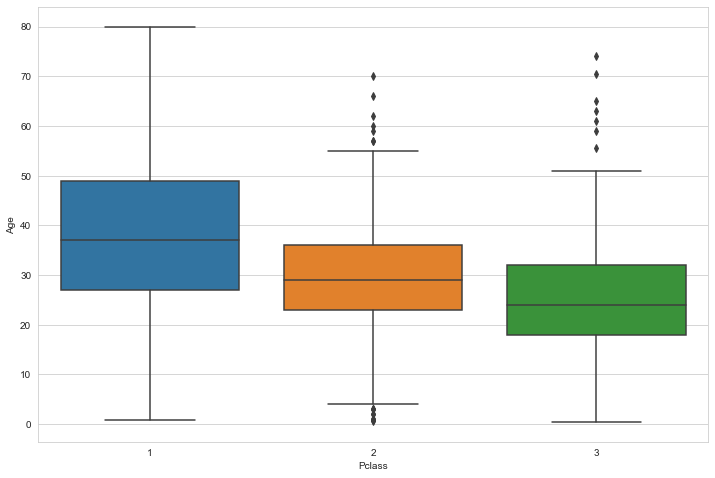

In [140]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age',data=df)

In [141]:
# based on passenger class and avg age we will replace the null values in age columns 
# creating the function to change the null values 
def impute_age(cols):
    age=cols[0]
    Pclass=cols[1]
    if Pclass==1:
        return 37
    elif Pclass==2:
        return 29
    else:
        return 24
    


In [142]:
#removing all the null values in Age
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)
#removing the cabin columns
df.drop('Cabin',axis=1,inplace=True)
# removing the rows with null embarked values
df.drop([61, 829],inplace=True)

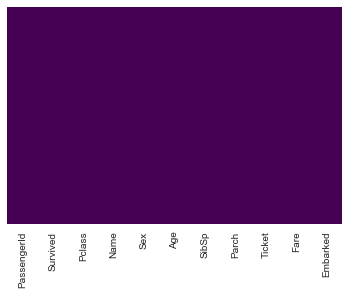

In [143]:
# checking the null values again
#Yellow is for NaN values 
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24,0,0,373450,8.0500,S


In [155]:
# Dropping all the non required 
df.dropna(inplace=True)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    int64  
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 83.3+ KB


# Converting the categorical Features

In [157]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [162]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
embarked=pd.get_dummies(df['Embarked'],drop_first=True)

In [165]:
# dropping the not req columns
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [166]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,24,1,0,7.2500
1,2,1,1,37,1,0,71.2833
2,3,1,3,24,0,0,7.9250
3,4,1,1,37,1,0,53.1000
4,5,0,3,24,0,0,8.0500


In [167]:
# adding the hot encoded columns
pd.concat([df,sex,embarked],axis=1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,24,1,0,7.2500,1,0,1
1,2,1,1,37,1,0,71.2833,0,0,0
2,3,1,3,24,0,0,7.9250,0,0,1
3,4,1,1,37,1,0,53.1000,0,0,1
4,5,0,3,24,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,29,0,0,13.0000,1,0,1
887,888,1,1,37,0,0,30.0000,0,0,1
888,889,0,3,24,1,2,23.4500,0,0,1
889,890,1,1,37,0,0,30.0000,1,0,0


In [169]:
# here survived is the dependent variable 
# so we create a train data set 
df.drop('Survived',axis=1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,24,1,0,7.2500
1,2,1,37,1,0,71.2833
2,3,3,24,0,0,7.9250
3,4,1,37,1,0,53.1000
4,5,3,24,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,29,0,0,13.0000
887,888,1,37,0,0,30.0000
888,889,3,24,1,2,23.4500
889,890,1,37,0,0,30.0000


In [170]:
df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

# Model Creation
## Here I have used logistic regression 

In [172]:
# splitting the data
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.30,random_state=101)

## Training and prediction

In [176]:
from sklearn.linear_model import LogisticRegression

In [178]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [184]:
prediction=logmodel.predict(x_test)

In [185]:
from sklearn.metrics import confusion_matrix

In [189]:
accuracy=confusion_matrix(y_test,prediction)

In [190]:
accuracy

array([[322,  64],
       [130, 106]], dtype=int64)

In [192]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.6881028938906752

In [194]:
prediction

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,